# Cursul 1

## Modele liniare 

Unul din primele modele în dinamica populațiilor este modelul lui Malthus:

> **Presupunem că avem o populația care crește datorită noilor nașteri cu un multiplu $f$ (fecunditate) al populației și în același timp o anumită fracție $d$ (rata de deces) a populației va muri.**

Spre exemplu dacă presupunem că un organism trăiește 5 ani putem presupune că $d=\frac{1}{5}$. Dacă de asemenea presupunem că sînt aproximativ 30 de nașteri la 100 de indivizi. *Se vede că am ales anii ca unitate de timp.*

**Întrebări:**

> 1. De ce $d \in (0,1]$? Ce ar însemna ca $d \leq 0$ sau $d > 1$?
> 2. De ce $f > 0$, dar se poate ca $f>1$?
> 3. Dacă alegem ca unitate de timp *zilele* cît vor fi $d$ și $f$ pentru elefanți, muște, bacterii?

Dacă $P$ este mărimea populației la un moment dat, vom studia variația $\Delta P$ a acesteia. În cazul nostru $\Delta P=fP-dP=(f-d)P$. 

Notînd cu $P_t$ valoarea populației la momentul $t$, atunci $\Delta P=P_{t+1}-P_t$, sau $P_{t+1}=P_t+\Delta P$. Deci $P_{t+1}=P_t+(f-d)P_t$,
sau $P_{t+1}=(1+f-d)P_t$. 

În exemplul nostru $f=0,3$, iar $d=0,2$. Astfel $P_{t+1}=1,1P_t$. În general vom face notația $P_{t+1}=\lambda P_t$.

**Exerciții:**

> 1. Dacă populația evoluează după regula $P_{t+1}=\lambda P_t$, atunci $P_t=\lambda^t P_0$.
> 2. Presupunem că o specie de insecte are un ciclu de viață în care o femelă depune 300 de ouă, apoi toți adulții mor. După eclozare doar 
$3\%$ din larve devin femele mature, restul mor sau devin masculi. Vrem să studiem evoluția populației de femele.

>> a) Determinați $f$, $d$ și ecuația de evoluție;

>> b) Populația va crește sau va descrește?

>> c) Presupunem că nu cunoaștem fecunditatea, dar știm că populația rămîne constantă. Cît este $f$?


Expresiile de forma $P_{t+1}=F\left(P_t\right)$ se numesc **relații de recurență**. În exemplul nostru $F(x)=\lambda x$. Astfel de funcții se numesc **liniare** și de aceea modele corespunzătoare se numesc liniare. Pe de altă parte în acest caz valorile lui $P_t$ cresc sau scad exponențial, de aceea aceste modele se mai numesc și *geometrice* sau *exponențiale*.

**Problemă:** S-a observat că în stadiile prelimiare de dezvoltare ale embrionului de broască diviziunea celulară are loc la intervale regulate astfel că numărul de celule se dublează o dată la 30 de minute. 

1. Scrieți relația de recurență care modelează această situație. Trebuie să alegeți unitatea de timp $t$ și valoarea inițială;

2. Folosind eventual programul de mai jos, scrieți tabelul valorilor lui $P_t$ în funcție de $t$. 

3. După 10 ore avem în jur de 30.000 de celule. Cum se potrivește cu modelul vostru? Ce concluzii biologice trageți de aici.




In [10]:
using PrettyTables,IJulia 
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
λ = IJulia.readprompt("λ = ")
λ = parse(Float64,λ)
vals=[P]
for t in 1:tstop
    P=λ*P
    append!(vals,P)
end
df=hcat(collect(0:tstop),vals)
conf=set_pt_conf(tf = tf_markdown, alignment = :c);
header=["Timp", "Valoare"];
pretty_table_with_conf(conf,df;header=header)

P0=  20
Timpul final =  20
λ =  2


| Timp |  Valoare  |
|------|-----------|
| 0.0  |   20.0    |
| 1.0  |   40.0    |
| 2.0  |   80.0    |
| 3.0  |   160.0   |
| 4.0  |   320.0   |
| 5.0  |   640.0   |
| 6.0  |  1280.0   |
| 7.0  |  2560.0   |
| 8.0  |  5120.0   |
| 9.0  |  10240.0  |
| 10.0 |  20480.0  |
| 11.0 |  40960.0  |
| 12.0 |  81920.0  |
| 13.0 | 163840.0  |
| 14.0 | 327680.0  |
| 15.0 | 655360.0  |
| 16.0 | 1.31072e6 |
| 17.0 | 2.62144e6 |
| 18.0 | 5.24288e6 |
| 19.0 | 1.04858e7 |
| 20.0 | 2.09715e7 |


P0=  20
Timpul final =  20
λ =  2


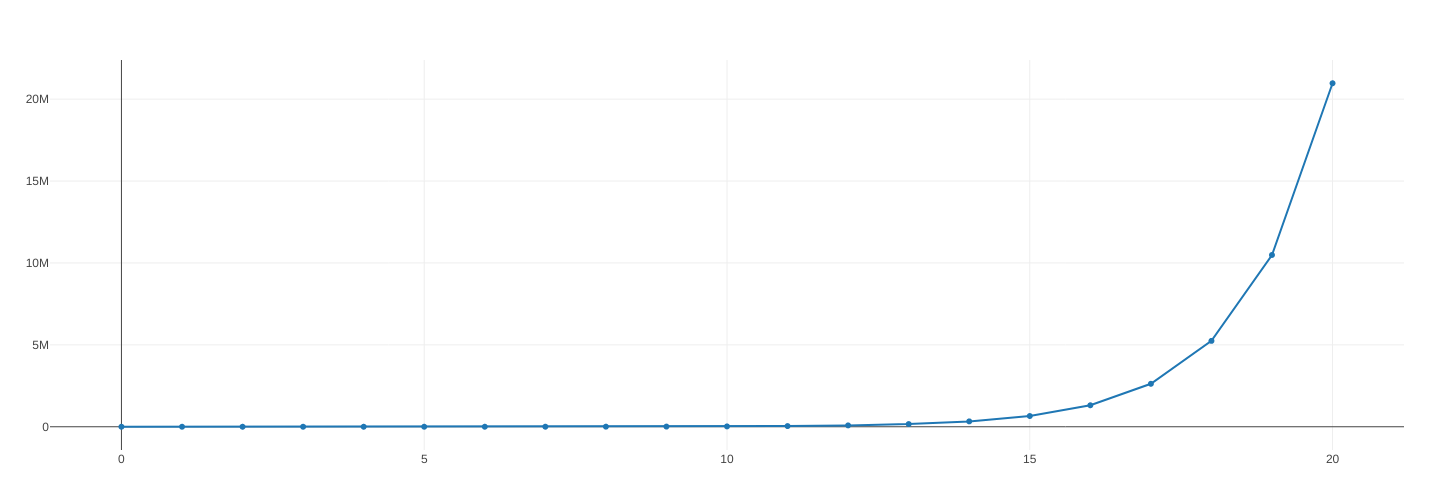

In [6]:
using IJulia, PlotlyJS
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
λ = IJulia.readprompt("λ = ")
λ = parse(Float64,λ)
vals=[P]
for t in 1:tstop
    P=λ*P
    append!(vals,P)
end
trace=scatter(x=collect(0:tstop),y=vals, mode="lines+markers", name="Nr. de indivizi")
plot([trace],Layout(legend_title_text="Populație"))

## Modele neliniare ##



   Modelul Malthusian nu poate fi folosit pe termen lung, deoarece prevede cresșterea exponențială a populației, iar funcția exponențială crește nelimitat și extrem de repede, ceea ce evident nu corespunde realității. Deci acest model în mod evident ignoră un aspect important.
   
   Problema provine din faptul că am presupus că fecunditatea și rata deceselor sînt constante indiferent de mărimea populației. O presupunere mai realistă este că pe măsura ce populația crește, fecunditatea scade și mortalitatea crește. Aceasta se traduce în următorul fapt
     
>**Pe măsură ce populația crește, rata de creștere scade.**
  
  Pentru început studiem *rata de creștere per-capita*, adică $\frac{\Delta P}{P}$. În modelul liniar avem $$\frac{\Delta P}{P}=r$$ sau grafic: 
  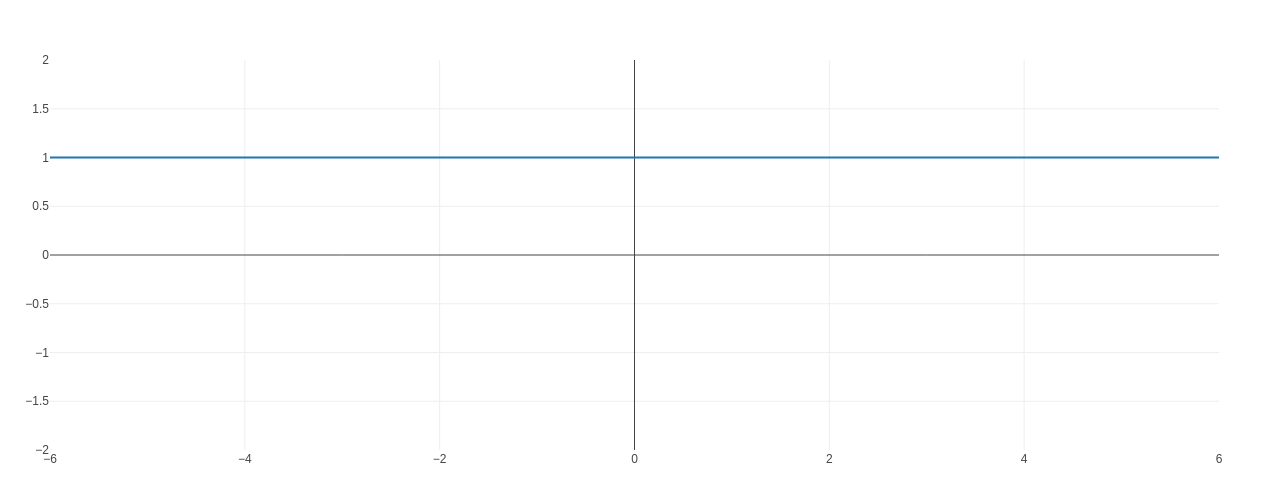
 
 Dacă presupunem că rata scade atunci vom avea o figură de tipul
 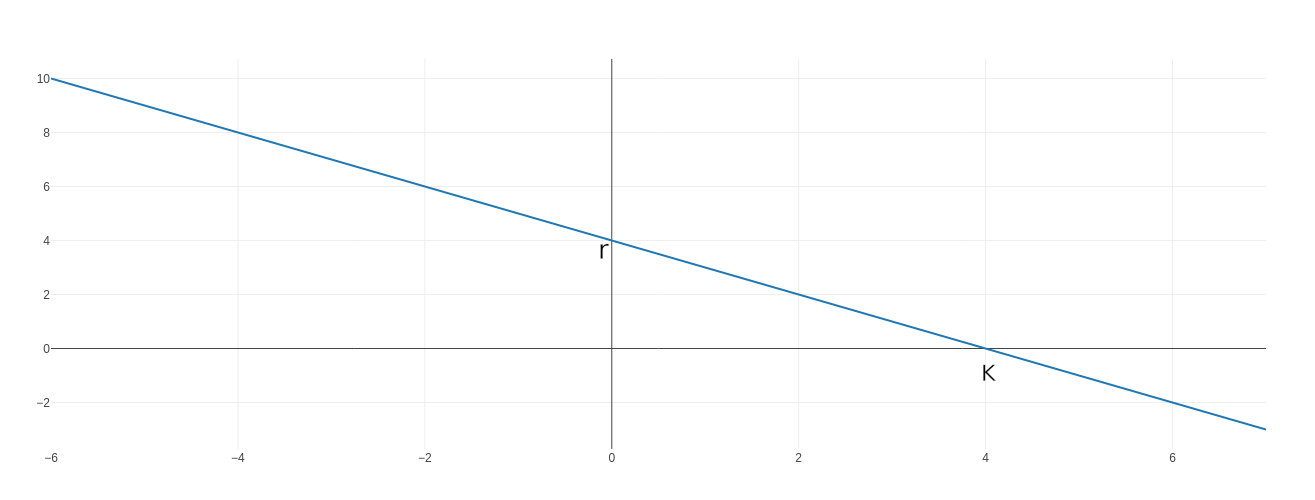
  
 În acest caz avem formula $$\frac{\Delta P}{P}=a\cdot P +b$$ cu $a<0$ și $b>0$. Notăm cu $r$ valoarea intersecției cu axa verticală și cu $K$ valoarea intersecției cu axa orizontală. 

**Exercițiu:**

  > Arătați că $$\frac{\Delta P}{P}=r\left(1-\frac{P}{K}\right).$$
  
  Se observă că $r > 0$ și $K > 0$. Facînd aceleași transformări ca în cazul modelului liniar obținem $$ P_{t+1}=P_t\left(1+r\left(1-\frac{P_t}{K}\right)\right).$$
  
  Acesta este **modelul logistic discret**. 
  
  Se observă că dacă $P < K$ atunci $\Delta P > 0$, deci populația va crește. Dacă, dimpotrivă $P > K$, atunci populația scade. $K$ se numește **capacitatea de încărcare a mediului** și reprezintă numărul maxim de indivizi care pot fi suportați de mediu.
  
  Dacă populația este mică, adică $P$ este mult mai mic decît $K$, atunci $P_{t+1} \approx (1+r)P_t$, deci modelul se comportă precum cel liniar. Din acest motiv $r$ se numește **rata intrinsecă finită de creștere** și este analogul lui $f-d$ din cazul malthusian. 

In [8]:
using PrettyTables,IJulia 
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
r = IJulia.readprompt("r = ")
r = parse(Float64,r)
K = IJulia.readprompt("K = ")
K = parse(Float64,K)
vals=[P]
for t in 1:tstop
    P=(1+r*(1-P/K))*P
    append!(vals,P)
end
df=hcat(collect(0:tstop),vals)
conf=set_pt_conf(tf = tf_markdown, alignment = :c);
header=["Timp", "Valoare"];
pretty_table_with_conf(conf,df;header=header)

P0=  0.5
Timpul final =  25
r =  0.6
K =  15


| Timp | Valoare |
|------|---------|
| 0.0  |   0.5   |
| 1.0  |  0.79   |
| 2.0  | 1.23904 |
| 3.0  | 1.92105 |
| 4.0  | 2.92606 |
| 5.0  | 4.33922 |
| 6.0  | 6.18961 |
| 7.0  | 8.37092 |
| 8.0  | 10.5906 |
| 9.0  | 12.4585 |
| 10.0 | 13.725  |
| 11.0 | 14.425  |
| 12.0 | 14.7568 |
| 13.0 | 14.9003 |
| 14.0 | 14.9597 |
| 15.0 | 14.9838 |
| 16.0 | 14.9935 |
| 17.0 | 14.9974 |
| 18.0 | 14.999  |
| 19.0 | 14.9996 |
| 20.0 | 14.9998 |
| 21.0 | 14.9999 |
| 22.0 |  15.0   |
| 23.0 |  15.0   |
| 24.0 |  15.0   |
| 25.0 |  15.0   |


P0=  0.5
Timpul final =  25
r =  0.6
K =  15


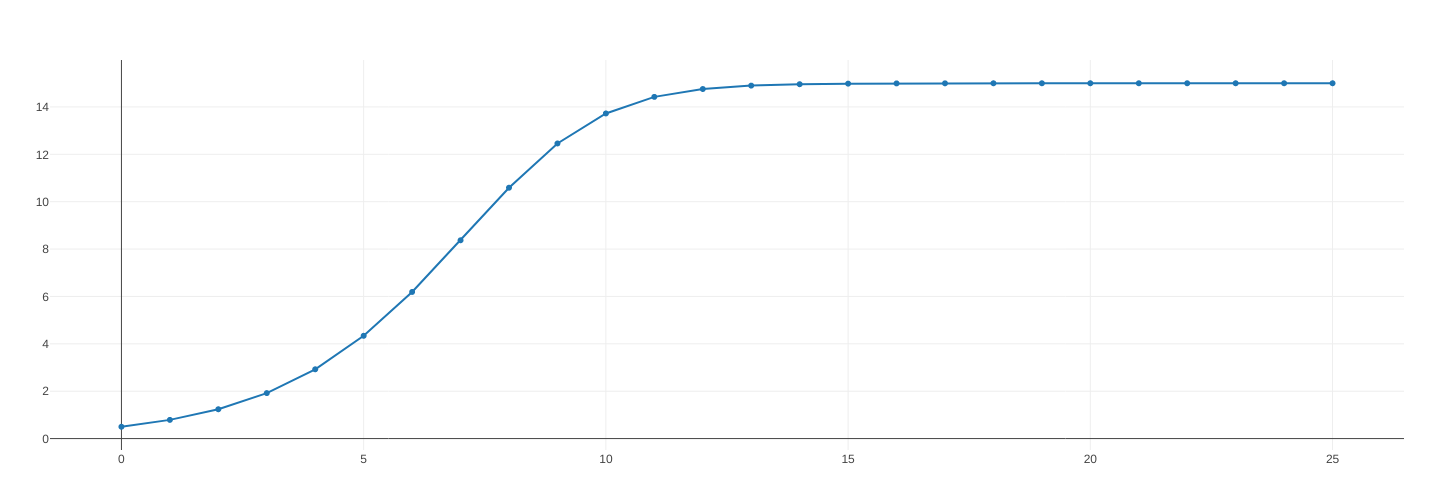

In [9]:
using PlotlyJS,IJulia 
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
r = IJulia.readprompt("r = ")
r = parse(Float64,r)
K = IJulia.readprompt("K = ")
K = parse(Float64,K)
vals=[P]
for t in 1:tstop
    P=(1+r*(1-P/K))*P
    append!(vals,P)
end
trace=scatter(x=collect(0:tstop),y=vals, mode="lines+markers", name="Nr. de indivizi")
plot([trace],Layout(legend_title_text="Populație"))

Modelul neliniar pe care l-am considerat are o comportare mult mai complicată decît modelul exponențial. Spre exemplu nu se poate da o formulă de tipul $P_t=f(t)$, deaceea trebuie să studiem comportamentul acestui model prin alte metode. 

Am văzut că la început (pentru valori mici ale lui $t$) valorile lui $P_t$ se schimbă dramatic. Aceste comportamente se numesc 
*tranzitorii*. De obicei sîntem mai interesați de  comportamentul pe termen lung, dar și comportamentele tranzitorii sînt importante. 

În exemplul nostru valorile lui $P_t$ se apropie de $10$, iar dacă $P_0=10$ atunci $P_t=10$ pentru toate valorile lui $t$. Spunem că $P_t=10$ este un punct de echilibru (sau punct fix) al modelului.

**Definiție:** Fie sistemul dinamic $P_{t+1}=F\left(P_t\right)$. O valoare $P^*$ cu proprietatea $P^*=F\left(P^*\right)$ se numește *echilibru*. Echivalent dacă scriem $\Delta P = G\left(P_t\right)$, atunci $P^*$ este echilibru dacă $G\left(P^*\right)=0$. 

Revenind la exemplul nostru cu $r=0,6$ și $K=10$, dacă scriem $P^*=P^*\left(1+0,6\left(1-\frac{P^*}{10}\right)\right)$ obținem două valori $P^*=0$ și $P^*=10$. Cele două echilibre sînt diferite: dacă $P_0$ este aproape de $0$, atunci $P_t$ se îndepărtează de $0$, iat dacă $P_0$ este aproape de $10$, atunci $P_t$ rămîn aproape de el pentru orice valori ale lui $t$. Spunem că $0$ este 
**echilibru instabil**, iar $10$ este **echilibru stabil**.

Este important să determinăm care echilibre sînt stabile și care instabile. Pentru aceasta să luăm un echilibru $P^*$ și scriem $P_t=P^*+p_t$. $p_t$ se numește perturbarea față de echilibru. Calculăm acum $P_{t+1}=P^*+p_{t+1}$, dacă $p_{t+1}$ este mai mare (în modul) decît $p_t$ înseamnă că sistemul s-a îndepărtat de echilibru, iar dacă $|p_{t+1}| < |p_t|$, atunci sistemul s-a apropiat de echilibru. Trebuie prin urmare să studiem cum se comportă sistemul pentru toate valorile mici ale lui $p_t$ ca sî decidem dacă echilibrul este stabil sau nu.

Să luăm spre exemplu sistemul $$P_{t+1}=P_t\left(1+0,6\cdot\left(1-\frac{P_t}{15}\right)\right).$$ Considerăm echilibrul $P^*=15$ care din experimente pare stabil. Scriem $P_t=15+p_t$ și înlocuim în ecuație. După ce facem calculele obținem $$p_{t+1}=0.4p_t-0.04p^2_{t}.$$

($0,04$ este $\frac{0,6}{15}$). Cum $p_t$ este foarte mic, $p^2_{t}$ este de asemenea mic, deci va fi neglijabil. Prin urmare $p_{t+1} \approx 0,4p_t$, deci factorul de dilatare este de fapt de compresie și orice valoare care pleacă din apropiere de $P^*$ va rămîne aproape de $P^*$. 

Acest proces prin care aproximăm $P_{t+1}$ cu $P^*+p_t$ și ignorăm termenii de grad superior se numește **liniarizare**.

> **Exercițiu:** Studiați celălalt echilibru al sistemului nostru și arătați că este instabil.

Să studiem acum un sistem general $P_{t+1}=F\left(P_t\right)$ cu un echilibru $P^*$. Atunci $$\frac{p_{t+1}}{p_t}=\frac{P_{t+1}-P^*}{P_t-P^*}=\frac{F\left(P_t\right)-P^*}{P_t-P^*}=\frac{F\left(P_t\right)-F\left(P^*\right)}{P_t-P^*}.$$

Cum ne interesează valorile lui $P_t$ apropiate de $P^*$ trecem la limită în ultima expresie $$\lim_{P_t \to P^*}\frac{F\left(P_t\right)-F\left(P^*\right)}{P_t-P^*}=F'(P^*).$$ Obținem următorul rezultat:

**Teoremă:** Fie sistemul dinamic $P_t=F(P_t)$ și $P^*$ un echilibru al său. Atunci $P^*$ este **stabil** dacă $|F'(P^*)| < 1$ și **instabil** dacă $|F'(P^*)| > 1$.

## Bifurcații și Haos ##

Vom scrie modelul logistic într-un mod simplificat. Avem $\Delta P=rP\left(1-\frac{P}{K}\right).$ Putem presupune că unitățile de măsură sînt luate astfel încît $K=1$ și obținem modelul logistic în forma sa clasică $\Delta P=rP(1-P)$ sau echivalent $P_{t+1}=P_t+rP_t(1-P_t)$ cu $r > 0$. Avem două echilibre $0$ și $1$. Factorii de întindere sînt

- $F'(0)=1+r$ pentru $0$;
- $F'(1)=1-r$ pentru $1$.

Deci $0$ este întotdeauna un echilibru instabil. Situația lui $1$ este mult mai complicată.

Dacă $r \leq 1$ evident că echilibrul este stabil. Din formula de aproximare $p_{t+1} \approx (1-r)p_t$ obținem că semnul lui $p_t$ nu se schimbă. Deci populația se apropie de echilibru fără să-l depășească. 

Dacă $1 < r < 2$, avem $-1 < 1-r < 0$, deci echilbrul este în continuare stabil, dar semnul lui $p_t$ se schimbă deci valorile populației oscilează în jurul poziției de echilibru pînă se stabilizează. Acest tip de comportament se numește **oscilație amortizată**.

Cînd $r > 2$ $|1-r|> 1$, deci echilibrul nu mai este stabil. Dacă facem experimente cu computerul se vede că pentru valori apropiate de $2$ sistemul va avea un $2-$ciclu, populația ia alternativ două valori una mai mică și una mai mare ca $1$. Apoi pe măsură ce $r$ crește apare un $4-$ciclu, apoi un $8-$ciclu etc. 
După o anumită valoare a lui $r \approx 2,65...$ nu mai apar ciclii, comportarea este aparent întîmplătoare. Un astfel de comportament se numește **haotic**.



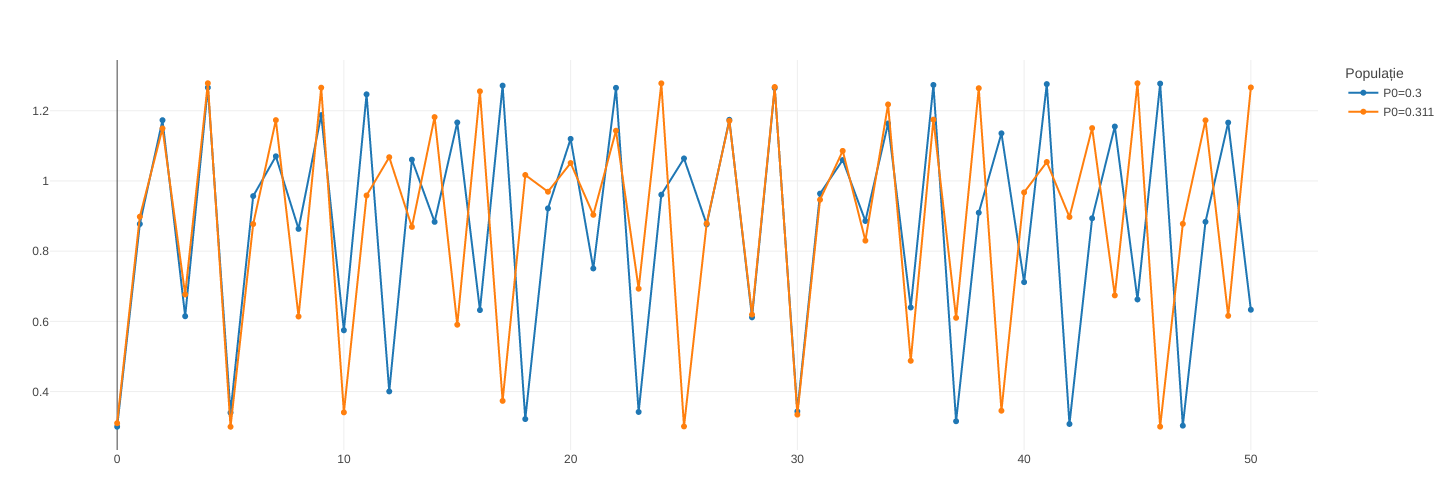

In [6]:
using PlotlyJS,IJulia 
P0=0.3
tstop = 50
r=2.75
vals0=[P0]
P=P0
for t in 1:tstop
    P=(1+r*(1-P))*P
    append!(vals0,P)
end
#trace=scatter(x=collect(0:tstop),y=vals, mode="lines+markers", name="Nr. de indivizi")
#plot([trace],Layout(legend_title_text="Populație"))
P1=0.31
tstop = 50
r=2.75
vals1=[P1]
P=P1
for t in 1:tstop
    P=(1+r*(1-P))*P
    append!(vals1,P)
end
trace0=scatter(x=collect(0:tstop),y=vals0, mode="lines+markers", name="P0=0.3")
trace1=scatter(x=collect(0:tstop),y=vals1, mode="lines+markers", name="P0=0.31")
plot([trace0,trace1],Layout(legend_title_text="Populație"))

După cum se vede din imaginea de mai sus, caracteristica principală a unui sistem haotic este că pentru valori inițiale apropiate, după un număr relativ mic de pași valorile obținute sînt foarte îndepărtate. 